   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

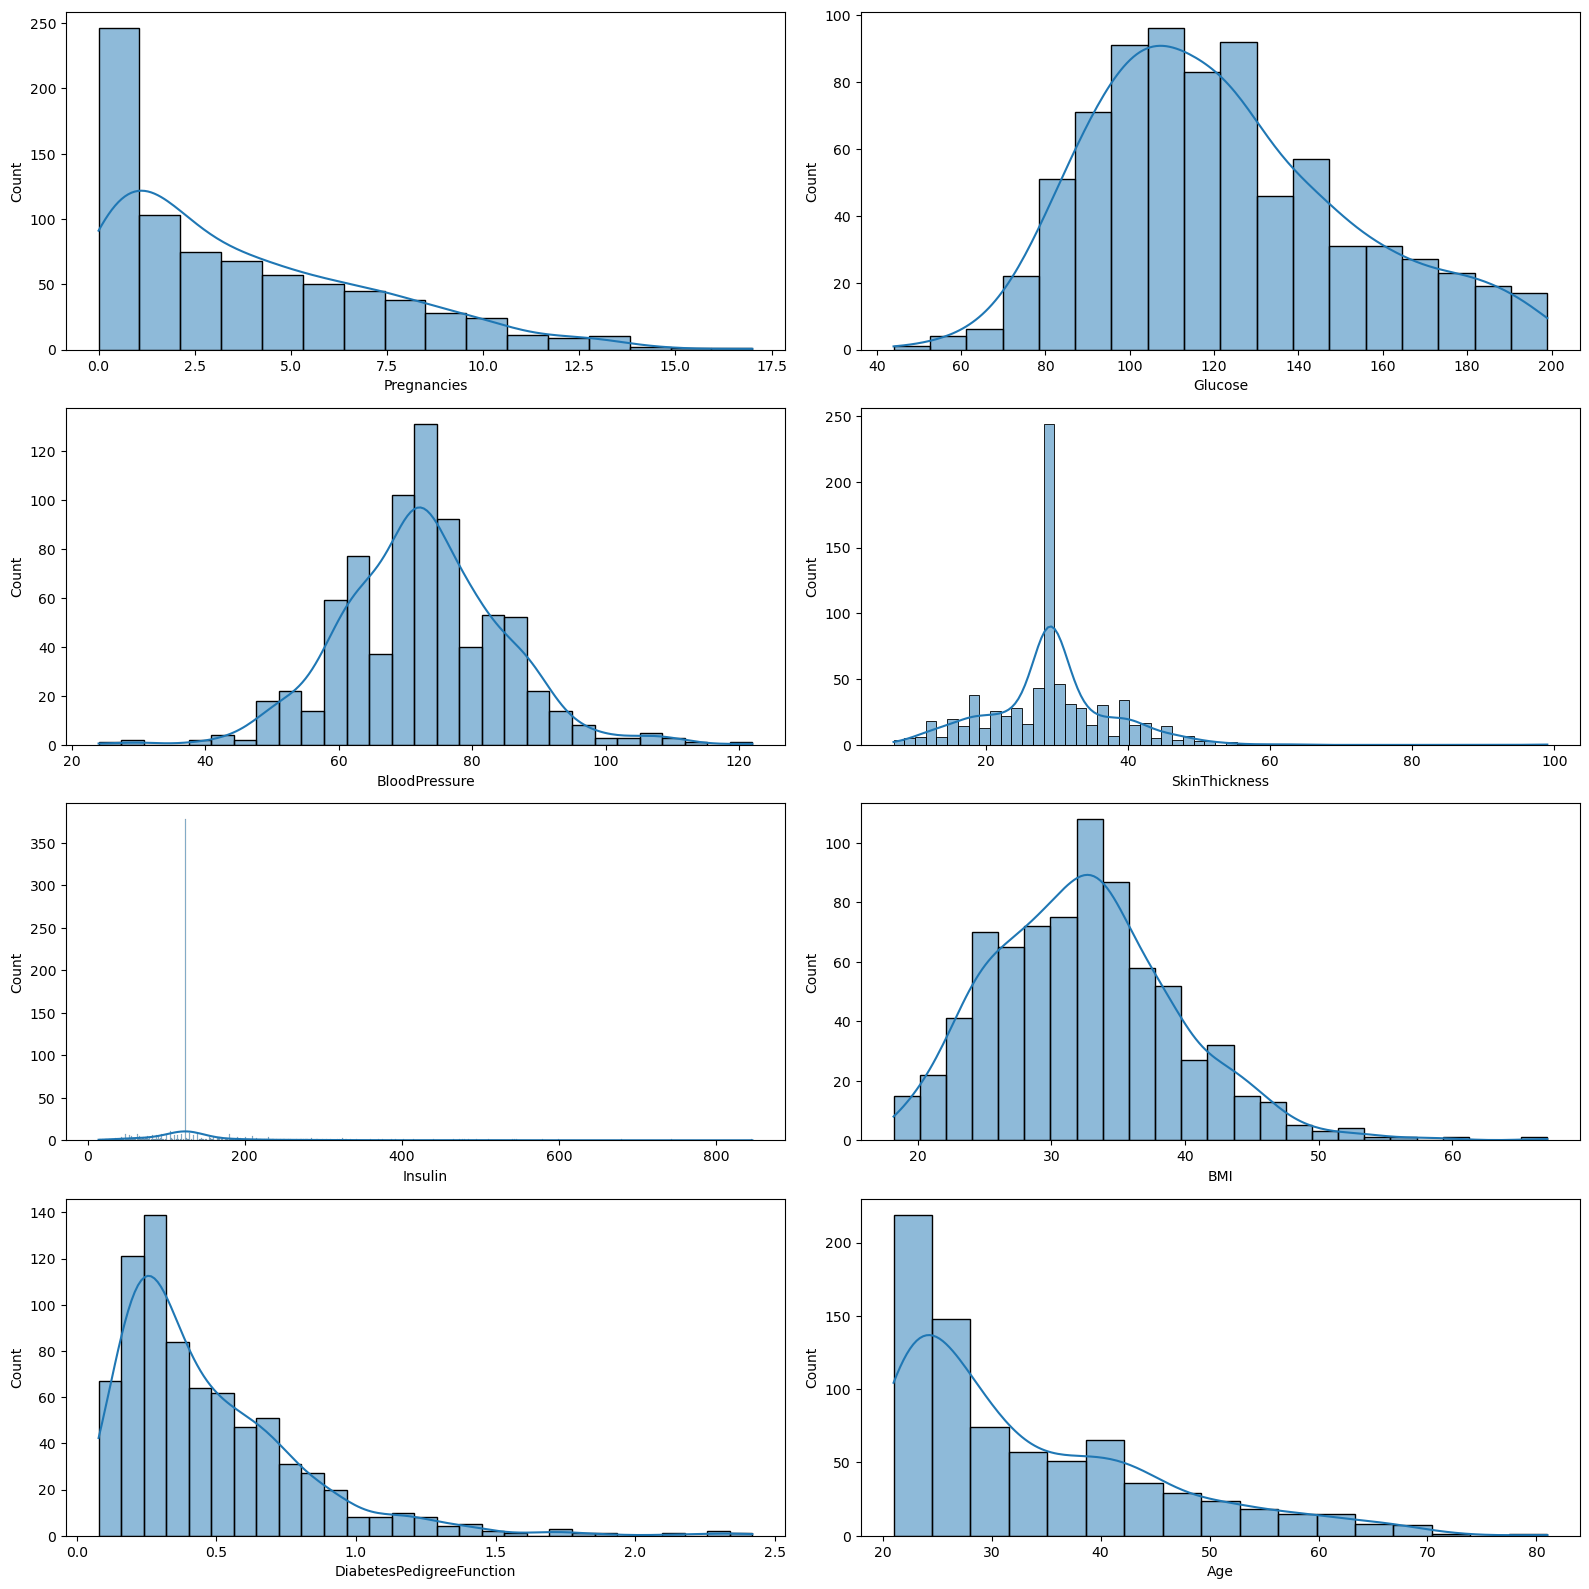

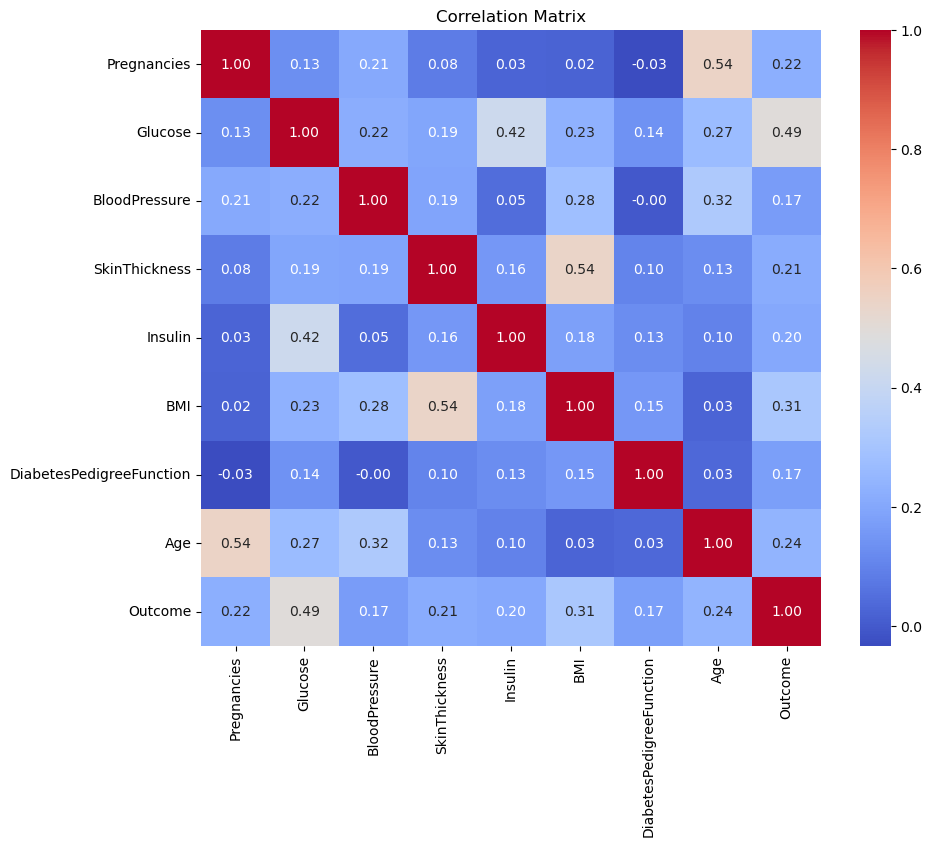

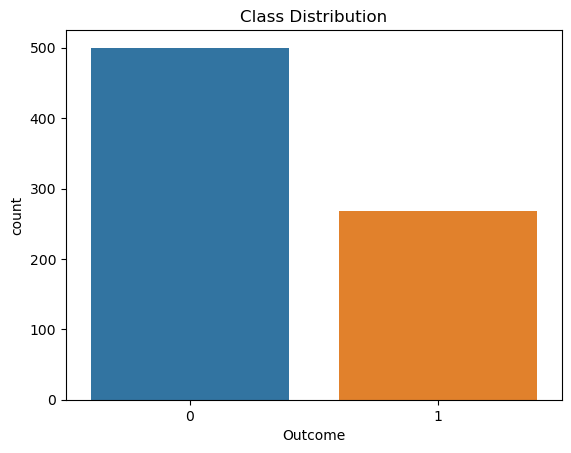

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv(r"C:\Users\Alisher Amer\OneDrive\Desktop\salam\diabetes.csv")

# Display the first few rows of the dataframe
print(df.head())

# Display the summary statistics of the dataframe
print(df.describe())

# Identify columns with zeros that need to be addressed
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(df[columns_to_replace].eq(0).sum())

# Replace zeros with NaN for imputation later
df[columns_to_replace] = df[columns_to_replace].replace(0, np.nan)

# Check missing values
print(df.isnull().sum())

# Impute missing values with the median before splitting
imputer = SimpleImputer(strategy='median')
df[columns_to_replace] = imputer.fit_transform(df[columns_to_replace])

# Check the summary statistics again after imputation
print(df.describe())

# Distribution of Features
fig, ax = plt.subplots(4, 2, figsize=(16, 16))
for variable, subplot in zip(df.columns, ax.flatten()):
    sns.histplot(df[variable], kde=True, ax=subplot)
plt.tight_layout()
plt.show()

# Correlation Matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Class Distribution
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution')
plt.show()
